In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import HTML, Layout
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles

We wanted to analyze the crime statistics in L.A. for the last 4 years in order to determine the current trend.

We found a dataset from a webpage called Kaggle: https://www.kaggle.com/datasets/candacegostinski/crime-data-analysis

Data was stored in the form of a CSV file with 28 columns and 955 339 rows.

<h1>Dataset overview</h1>

In [2]:
df = pd.read_csv('dataset.csv')
print(df.columns)
df # 955 339 x 28 data set

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


Enhancing the dataset: changing formats, creating columns, filtering the data...

In [3]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %H:%M:%S AM')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %H:%M:%S AM')
df['Year'] = df['DATE OCC'].dt.year
df['Year_Month'] = df['DATE OCC'].dt.to_period('M')

df.loc[~df['Vict Descent'].isin([ 'W', 'B', 'H', 'X', 'A', 'K' ]), 'Vict Descent'] = 'O'

<h1>Graph 1: Frequency of crimes from 2020 to 2024</h1>

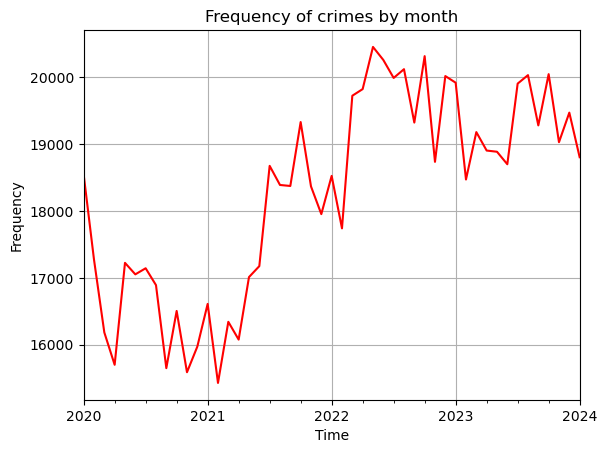

In [4]:
grouped_by_date = df.groupby('Year_Month').count()
grouped_by_date[:-5]['DR_NO'].plot(title='Frequency of crimes by month', xlabel='Time', ylabel='Frequency', color="red")
plt.grid()
plt.show()

It is relevant from the graph that the crime rates have worsened over the observed period.

<h1>Graph 2: Age and gender distribution of victims</h1>

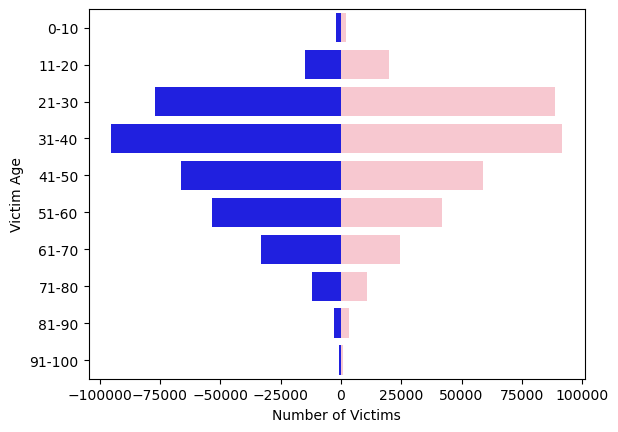

In [5]:
victims_with_age = df.loc[(df['Vict Age'] > 0) & (df['Vict Sex'].isin([ 'M', 'F' ])), [ 'Vict Age', 'Vict Sex' ]]

grouped_age_victims = victims_with_age.groupby('Vict Age').count()
males_count = victims_with_age[victims_with_age['Vict Sex'] == 'M'].groupby('Vict Age').size()
males_count.name = 'Male'
women_count = victims_with_age[victims_with_age['Vict Sex'] == 'F'].groupby('Vict Age').size()
women_count.name = 'Female'
df3 = pd.merge(males_count, women_count, left_index=True, right_index=True)
df4 = pd.merge(df3, grouped_age_victims, left_index=True, right_index=True)
df4['Male'] = df4['Male'] * -1
df4 = df4.reset_index()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df4['Age Group'] = pd.cut(df4['Vict Age'], bins=bins, labels=labels, right=False)

grouped_df = df4.groupby('Age Group').agg({'Male': 'sum', 'Female': 'sum', 'Vict Sex': 'sum'}).reset_index()

sns.barplot(x='Male', y='Age Group', data=grouped_df, lw=0, color='blue', label='Male')
sns.barplot(x='Female', y='Age Group', data=grouped_df, lw=0, color='pink', label='Female')
plt.xlabel("Number of Victims")
plt.ylabel("Victim Age");

Overall, the distribution of victims by gender is fairly similar. There is slightly more female victims in the age groups 11-30,
<tr>but for the ages 41 and higher the male population is targeted more often. We can also see that the age group targeted the most is 31-40.

<h1>Graph 3: Distribution of victims by descent</h1>

We wanted to see if the descent of victims is correlated with the descent of the overall population in LA.


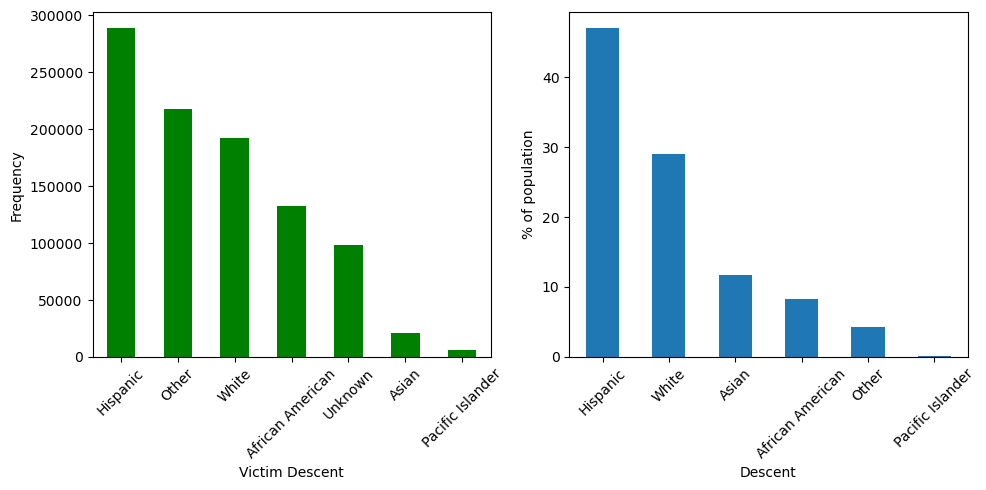

In [6]:
fig, axes=plt.subplots(1, 2, figsize=(10,5))
vict_desc = df['Vict Descent'].value_counts()
vict_desc.rename(index={"H":"Hispanic","O":"Other","W":"White","B":"African American","X":"Unknown","A":"Asian","K":"Pacific Islander"}, inplace=True)
vict_desc.plot(xlabel="Victim Descent",ylabel="Frequency",kind="bar",color="green",rot=45, ax=axes[0])

la_population = pd.DataFrame([ 46.9, 28.9, 11.7, 8.3, 4.2, 0.1  ], index=['Hispanic', 'White', 'Asian', 'African American', 'Other', 'Pacific Islander'])
la_population.plot(kind='bar', rot=45, xlabel='Descent', ylabel='% of population', legend=False, ax=axes[1])

plt.tight_layout()
plt.show()


We have come to the conclusion that the hispanic ethnic group is the biggest in the L.A. area, which explains
<br>why their number of victims is the highest. White is also the second largest ethnic group, which coincides
<br>with our findings. We can see that the crimes against African Americans are more common than crimes against
<br>Asians even though Asians represent almost 12 % of the population in L.A., while African Americans
<br>represent only around 8 %.

<h1>Graph 4: Victim percentage distribution by descent in a given area</h1>

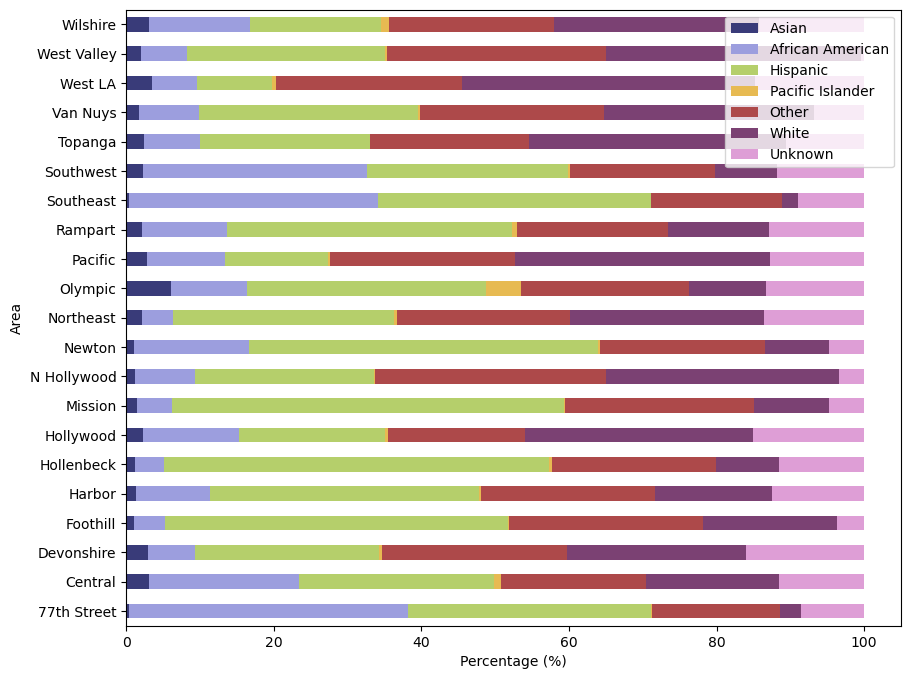

In [7]:
vd_grouped = df.groupby(['AREA NAME', 'Vict Descent']).size().unstack(fill_value=0)
grouped_percentage = vd_grouped.div(vd_grouped.sum(axis=1), axis=0) * 100
grouped_percentage.rename(columns={"H":"Hispanic","O":"Other","W":"White","B":"African American","X":"Unknown","A":"Asian","K":"Pacific Islander"}, inplace=True)

grouped_percentage.plot(kind='barh', stacked=True, figsize=(10, 8), cmap='tab20b')

plt.xlabel('Percentage (%)')
plt.ylabel('Area')
plt.legend(loc="upper right")
plt.show()

The graph clearly shows that victims of different descents are more targeted in different neighbourhoods. For example,
<br>in Southwest, Southeast and 77th Street areas the African American population is targeted much more than in other parts of the city.

<h1>Graph 5: Frequency of reporting delays</h1>

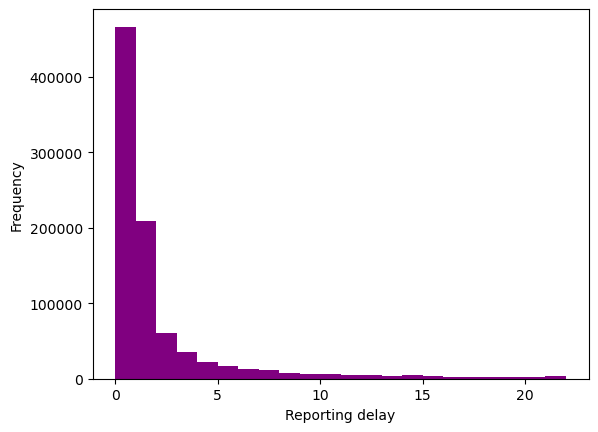

In [8]:
df['Diff'] = pd.to_numeric(df['Date Rptd'] - df['DATE OCC']) / (3600 * 24 * 10e8)
df['Diff'].plot(kind='hist', bins=range(23), color="purple")
plt.xlabel("Reporting delay");

Crimes are most commonly reported during the first few days and the reporting delay is exponentially
<br>decreasing over time.

<h1>Graph 6: Average reporting delay in a given area</h1>

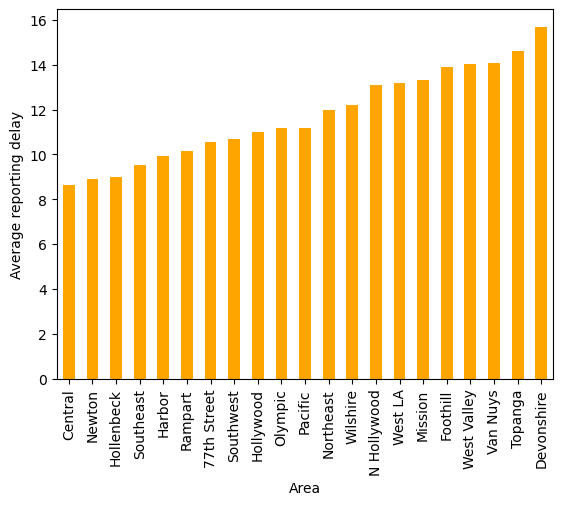

In [9]:
grouped = df.groupby('AREA NAME')

grouped_mean = grouped['Diff'].mean()
sorted_mean = grouped_mean.sort_values()
sorted_mean.plot(kind='bar', color="orange")
plt.xlabel("Area")
plt.ylabel("Average reporting delay");

Because the central districts have more capacity to process criminal reports due to a higher number
<br> of police stations, the average reporting delay is much lower than in other parts of the city.

<h1>Graph 7: Frequency of crimes in a given area</h1>

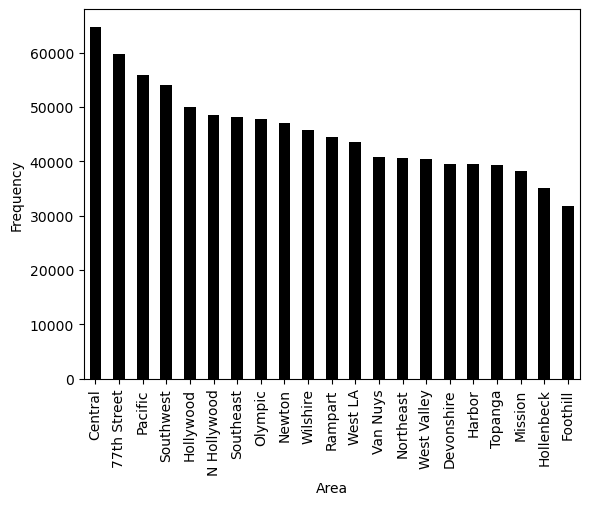

In [10]:
df['AREA NAME'].value_counts().plot(kind='bar',color="black")
plt.xlabel("Area")
plt.ylabel("Frequency");

We can observe that the highest number of crimes occur in the Central area of L.A.
<br>This is most likely due to the fact that it has more urban activity compared to
<br>suburban districts, such as Foothill, Mission and Topanga.

<h1>Map 1: Spatial distribution of crimes</h1>

In [11]:
la_center = 34.052235, -118.243683

la_map = Map(
    center=la_center,
    zoom=11,
    layout=Layout(width='100%', height='900px')
)


def add_marker(row):
    center = row["LAT"], row["LON"]
    m = Marker(
        location=center,
        title=f"ID: {row['DR_NO']} at {row['DATE OCC']}",
    )

    la_map.add_layer(m)
    m.popup = HTML(f"{m.title}<br/>{row['Crm Cd Desc']}")


df.sample(n=200, random_state=0).apply(add_marker, axis=1)
la_map.save("my_2024_map.html")

from IPython.display import HTML
HTML(filename="my_2024_map.html")

<h1>Table 1: Most frequent types of crime in a given area</h1>

In [12]:
type_grouped = df.groupby(['AREA NAME', 'Crm Cd Desc']).count().reset_index()
sorted_type = type_grouped.sort_values(by=["AREA NAME", "DR_NO"],ascending=False)
type_table = sorted_type.groupby("AREA NAME").first().reset_index()
type_table.rename(columns={"AREA NAME":"Area","Crm Cd Desc":"Crime type","DR_NO":"Frequency"}, inplace=True)
type_table[["Area","Crime type","Frequency"]]

,Area,Crime type,Frequency
0,77th Street,VEHICLE - STOLEN,8042
1,Central,BURGLARY FROM VEHICLE,8860
2,Devonshire,VEHICLE - STOLEN,3589
3,Foothill,VEHICLE - STOLEN,4141
4,Harbor,VEHICLE - STOLEN,5630
5,Hollenbeck,VEHICLE - STOLEN,5637
6,Hollywood,BATTERY - SIMPLE ASSAULT,4481
7,Mission,VEHICLE - STOLEN,5372
8,N Hollywood,VEHICLE - STOLEN,4596
9,Newton,VEHICLE - STOLEN,7678


In the majority of areas the most popular reported crime type is a stolen vehicle.